In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df= pd.read_csv('data/whisky.csv', index_col='RowID')
df.head()

,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
RowID,,,,,,,,,,,,,,,,
1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680
2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570
3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320
4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220
5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140


In [3]:
df.columns[15]

'Longitude'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 1 to 86
Data columns (total 16 columns):
Distillery    86 non-null object
Body          86 non-null int64
Sweetness     86 non-null int64
Smoky         86 non-null int64
Medicinal     86 non-null int64
Tobacco       86 non-null int64
Honey         86 non-null int64
Spicy         86 non-null int64
Winey         86 non-null int64
Nutty         86 non-null int64
Malty         86 non-null int64
Fruity        86 non-null int64
Floral        86 non-null int64
Postcode      86 non-null object
Latitude      86 non-null int64
Longitude     86 non-null int64
dtypes: int64(14), object(2)
memory usage: 11.4+ KB


In [5]:
df.describe()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Latitude,Longitude
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,8.600000e+01
mean,2.069767,2.290698,1.534884,0.546512,0.116279,1.244186,1.383721,0.976744,1.465116,1.802326,1.802326,1.697674,287247.162791,8.026597e+05
std,0.930410,0.717287,0.863613,0.990032,0.322439,0.853175,0.784686,0.932760,0.821730,0.629094,0.779438,0.855017,67889.046814,8.802422e+04
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126680.000000,5.542600e+05
25%,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,265672.500000,7.556975e+05
50%,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,319515.000000,8.398850e+05
75%,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,328630.000000,8.507700e+05
max,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,381020.000000,1.009260e+06


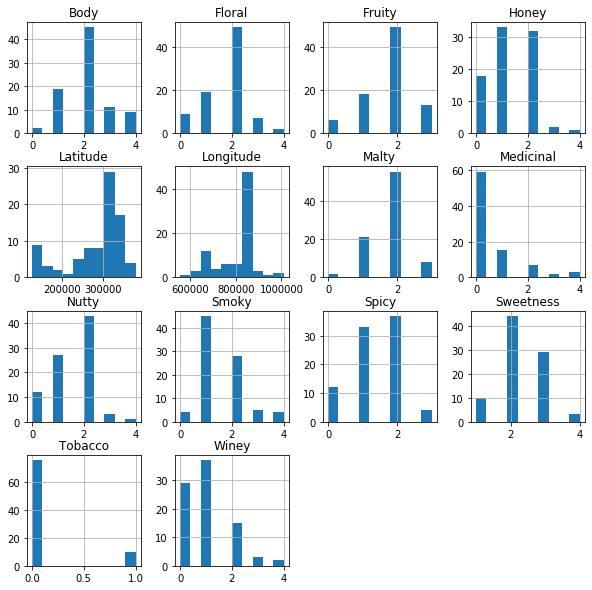

In [6]:
df.hist(figsize=(10,10))
plt.show()

Looking at the data , it seems like it is mostly made up of categorical features. The only continous features are geo location features.

## Postcodes and Distillery are text columns
It would only make sense for me to drop them as they are non numeric and not categorical but text which does not influence the output.

In [7]:
df= df.drop(['Postcode', 'Distillery', 'Longitude', 'Latitude', 'Body'], axis=1)

In [8]:
## Distillery can be coded

In [9]:
df.head()

,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
RowID,,,,,,,,,,,
1,2,2,0,0,2,1,2,2,2,2,2
2,3,1,0,0,4,3,2,2,3,3,2
3,3,2,0,0,2,0,0,2,2,3,2
4,1,4,4,0,0,2,0,1,2,1,0
5,2,2,0,0,1,1,1,2,3,1,1


In [24]:
from sklearn.decomposition import KernelPCA

rbf_pca= KernelPCA(n_components=2, kernel='rbf')
X_reduced= rbf_pca.fit_transform(df)

Here I use Principal compnent analysis to reduce our data to a 2 dimensional space. This does not necessarily lose the quality of the data, yet it allows us

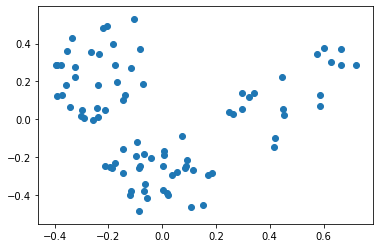

In [25]:
#component a and b
x=X_reduced[:,0]
y=X_reduced[:,1]

plt.scatter(x, y)
plt.show()

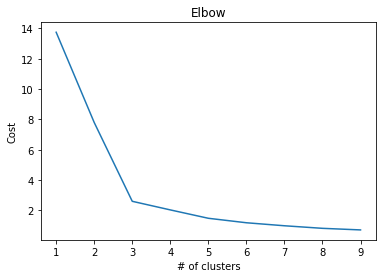

In [26]:
from sklearn.cluster import KMeans

costs=[]
for clusters in range(1,10):
    km= KMeans(n_clusters=clusters, random_state=42)
    km.fit(X_reduced)
    costs.append(km.inertia_)
plt.plot(range(1,10), costs)
plt.title('Elbow')
plt.xlabel('# of clusters')
plt.ylabel('Cost')
plt.show()
    

Looking at the elbow graph plotted above, it is evident that the best choice for the number of clusters is 3.

In [27]:
km= KMeans(n_clusters=3, random_state=42)
y_preds= km.fit_predict(X_reduced)

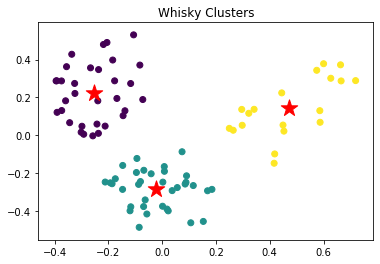

In [28]:

plt.scatter(x, y, c=y_preds, cmap='viridis')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='red', marker='*')
plt.title('Whisky Clusters')
plt.show()

In [29]:
df['cluster']= y_preds
df.cluster.value_counts()

1    35
0    32
2    19
Name: cluster, dtype: int64